# Processing the GDELT VGKG Dataset Articles

In [4]:
import glob
import sys
import os
from ipywidgets import FloatProgress
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# ALWAYS import from dummy for I/O bound tasks
from multiprocessing.dummy import Pool as DummyPool
from multiprocessing import Pool

%load_ext autoreload
%autoreload 2

# Autoreload code so no jupyter restarts are required
from src.data import webpage 
from src import util 

data_dir = "../../../../data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extract sentences
Useful for RNN approaches to sentence encoding

In [5]:
files = glob.glob(data_dir + "/raw/articles/[0-9]*")
f = FloatProgress(min=0, max=len(files))
display(f)
pool = Pool(20)
results = list()
for result in pool.imap(webpage.extract_sentences_and_save, files):
    f.value += 1
    results.append(result)
pool.close()
pool.join() 

FloatProgress(value=0.0, max=4070.0)

## Explore Sentences

In [17]:
def get_lengths(path):
    lengths = list()
    files = glob.glob(data_dir + path)
    for file in files:
        lengths.append((file.split('/')[-1],len(util.load_gzip_pickle(file))))
    return lengths
            
df = pd.DataFrame(get_lengths("/interim/sentences/[0-9]*"), columns=["File","Length"])
df.sort_values("Length", ascending=False).head()

,File,Length
114,1114,4676
898,2007,1520
1483,2642,1063
2744,4024,1007
3737,626,983


In [16]:
df_filtered = df[df["Length"] < 500]
df_filtered = df_filtered[df_filtered["Length"] > 10]

In [18]:
len(df_filtered), len(df)

(3015, 4064)

## Filter Language

In [19]:
files = glob.glob(data_dir + "/interim/sentences/[0-9]*")
f = FloatProgress(min=0, max=len(files))
display(f)
pool = Pool(8)
results = list()
for result in pool.imap(webpage.save_if_english, files):
    f.value += 1
    results.append(result)
pool.close()
pool.join() 

FloatProgress(value=0.0, max=4064.0)

## Explore Language

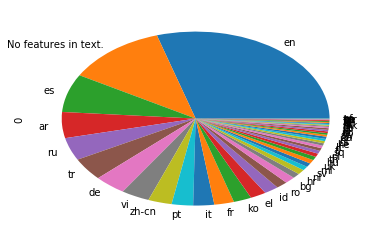

In [20]:
pd.DataFrame(results)[0].value_counts().plot.pie()

## Filter by sentence length and then number of valid sentences

In [26]:
files = glob.glob(data_dir + "/interim/sentences_english/[0-9]*")
f = FloatProgress(min=0, max=len(files))
display(f)
pool = Pool(8)
results = list()
for result in pool.imap(webpage.save_if_passes_filter, files):
    f.value += 1
    results.append(result)
pool.close()
pool.join()

FloatProgress(value=0.0, max=1206.0)

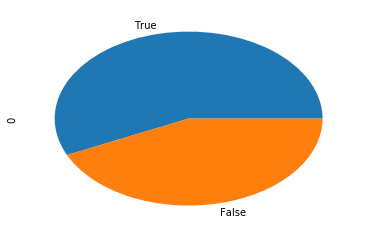

In [27]:
pd.DataFrame(results)[0].value_counts().plot.pie()

In [32]:
#util.load_gzip_pickle(data_dir + "/processed/sentences/32")

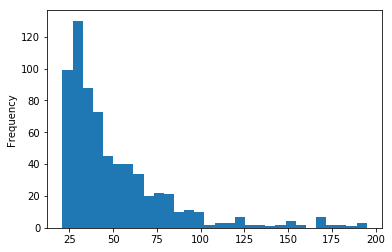

In [30]:
df = pd.DataFrame(get_lengths("/processed/sentences/[0-9]*"), columns=["File","Length"])
df["Length"].plot.hist(bins=30)

## Tokenize (unfiltered) sentences

In [35]:
files = glob.glob(data_dir + "/interim/sentences_english/[0-9]*")
f = FloatProgress(min=0, max=len(files))
display(f)
pool = Pool(8)
results = list()
for result in pool.imap(webpage.tokenize_and_save, files):
    f.value += 1
    results.append(result)
pool.close()
pool.join()

FloatProgress(value=0.0, max=1206.0)

In [45]:
word_count = pd.Series()
files = glob.glob(data_dir + "/processed/tokens/[0-9]*")
for file in files:
    word_count = word_count.append(pd.Series(util.load_gzip_pickle(file)))
word_count.value_counts().head()

the    35100
to     21110
of     19436
and    19200
in     14613
dtype: int64